# Злиття датафреймів, агрегування даних та візуалізація даних
**Мета:** Вивчення функцій Pandas для злиття, агрегування та візуалізації даних.

1. Загрузити файл з даними про споживання енергії “En_In.xls”

In [13]:
import pandas as pd
import numpy as np

skip_rows = list(range(0, 17)) + list(range(245, 284))
Energy = pd.read_excel('En_In.xls', usecols=[2, 3, 4, 5], names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'], skiprows=skip_rows)
Energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.67
1,Albania,102,35,100.00
2,Algeria,1959,51,0.55
3,American Samoa,...,...,0.64
4,Andorra,9,121,88.70
...,...,...,...,...
222,Viet Nam,2554,28,45.32
223,Wallis and Futuna Islands,0,26,0.00
224,Yemen,344,13,0.00
225,Zambia,400,26,99.71


2. Перевести дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж
= 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з
"....."), переконайтеся, що це відображається як значення np.NaN.


In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)
Energy['Energy Supply'] = pd.to_numeric(Energy['Energy Supply'], errors='coerce')
Energy['Energy Supply per Capita'] = pd.to_numeric(Energy['Energy Supply per Capita'], errors='coerce')
Energy['Energy Supply'] = Energy['Energy Supply'].mul(1000000).where(Energy['Energy Supply'] % 1 == 0)
Energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.00,10.00,78.67
1,Albania,102000000.00,35.00,100.00
2,Algeria,1959000000.00,51.00,0.55
3,American Samoa,NaN,NaN,0.64
4,Andorra,9000000.00,121.00,88.70
...,...,...,...,...
222,Viet Nam,2554000000.00,28.00,45.32
223,Wallis and Futuna Islands,0.00,26.00,0.00
224,Yemen,344000000.00,13.00,0.00
225,Zambia,400000000.00,26.00,99.71


3. Існує також декілька країн, що мають в назві цифри та/або дужки. Їх слід видалити.

In [15]:
Energy['Country'] = Energy['Country'].str.replace(r'\(.*', '', regex=True).str.strip()
Energy['Country'] = Energy['Country'].str.replace(r'\d+', '', regex=True).str.strip()
Energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.00,10.00,78.67
1,Albania,102000000.00,35.00,100.00
2,Algeria,1959000000.00,51.00,0.55
3,American Samoa,NaN,NaN,0.64
4,Andorra,9000000.00,121.00,88.70
...,...,...,...,...
222,Viet Nam,2554000000.00,28.00,45.32
223,Wallis and Futuna Islands,0.00,26.00,0.00
224,Yemen,344000000.00,13.00,0.00
225,Zambia,400000000.00,26.00,99.71


4. Перейменуйте наступний список країн:
- "Republic of Korea": "South Korea",
- "United States of America": "United States",
- "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
- "China, Hong Kong Special Administrative Region": "Hong Kong"

In [16]:
Energy.loc[Energy['Country'] == 'Republic of Korea', 'Country'] = 'South Korea'
Energy.loc[Energy['Country'] == 'United States of America', 'Country'] = 'United States'
Energy.loc[Energy['Country'] == 'United Kingdom of Great Britain and Northern Ireland', 'Country'] = 'United Kingdom'
Energy.loc[Energy['Country'] == 'China, Hong Kong Special Administrative Region', 'Country'] = 'Hong Kong'
Energy.index = range(1, len(Energy) + 1)
Energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,321000000.00,10.00,78.67
2,Albania,102000000.00,35.00,100.00
3,Algeria,1959000000.00,51.00,0.55
4,American Samoa,NaN,NaN,0.64
5,Andorra,9000000.00,121.00,88.70
...,...,...,...,...
223,Viet Nam,2554000000.00,28.00,45.32
224,Wallis and Futuna Islands,0.00,26.00,0.00
225,Yemen,344000000.00,13.00,0.00
226,Zambia,400000000.00,26.00,99.71


In [17]:
Energy.loc[Energy['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
4,American Samoa,NaN,NaN,0.64
25,Bolivia,336000000.00,32.00,31.48
165,South Korea,11007000000.00,221.00,2.28


5. Завантажити дані про ВВП з файлу „gpd.csv” та перейменувати наступний список країн:
- "Korea, Rep.": "South Korea",
- "Iran, Islamic Rep.": "Iran",
- "Hong Kong SAR, China": "Hong Kong"

In [18]:
GPD = pd.read_csv(r'gpd.csv', header=None)
non_numeric_names = GPD.iloc[4].values[:4]
numeric_names = np.round(GPD.iloc[4].values[4:].astype(int)).astype(str)

GPD = pd.read_csv(r'gpd.csv', header=None, names=np.concatenate((non_numeric_names, numeric_names)), skiprows=range(0, 5))
GPD.drop(columns=GPD.columns[4:4 + (2006 - 1960)], inplace=True)
GPD.rename(columns={'Country Name': 'Country'}, inplace=True)

GPD.loc[GPD['Country'] == 'Korea, Rep.', 'Country'] = 'South Korea'
GPD.loc[GPD['Country'] == 'Iran, Islamic Rep.', 'Country'] = 'Iran'
GPD.loc[GPD['Country'] == 'Hong Kong SAR, China', 'Country'] = 'Hong Kong'
GPD.head(1)

,Country,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,2467703910.61,NaN,NaN,NaN,NaN,NaN


6. Завантажити дані з файлу „scimagojr.xlsx”, який класифікує країни на основі
їхніх публікацій в журналах у галузі енергетичного машинобудування та
енергетичних технологій.

In [19]:
scimagojr = pd.read_excel('scimagojr.xlsx', skiprows=range(16, 192))
scimagojr

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


7. Приєднати три набори даних із завдань 1-6 до нового набору даних

In [20]:
merged = pd.merge(scimagojr, Energy, on="Country", how="left")
result = pd.merge(merged, GPD, on="Country", how="left")
result.set_index('Country', inplace=True)
result.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000.00,93.00,19.75,3992331462570.89,4559041383517.93,4997775145605.96,5459247267275.14,6039658508485.59,6612490294273.65,7124977970399.61,7672447738017.42,8230120617793.52,8797998940421.28
United States,2,96661,94747,792274,265436,8.20,230,90838000000.00,286.00,11.57,14792303791800.00,15055395304800.00,15011490541400.00,14594842181900.00,14964372000000.00,15204019634600.00,15542161722300.00,15773666098800.00,16156618476000.00,16548573278300.00
Japan,3,30504,30287,223024,61554,7.31,134,18984000000.00,149.00,10.23,5496541517363.31,5617035943770.73,5558526873313.82,5251308399909.32,5498717815809.77,5473738114222.05,5569101602926.18,5644658523313.42,5642884448582.19,5669563143140.97
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000.00,124.00,10.60,2419630700401.73,2482203235475.90,2470614405284.30,2367047611711.99,2403504326328.80,2450911011124.85,2479808627472.19,2533370110012.36,2605643189894.93,2666333396477.13
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000.00,214.00,17.29,1385792607182.58,1504071117741.30,1583004071092.11,1459199142720.26,1524917468442.01,1589942641764.29,1645875899596.27,1666934123163.16,1678708855070.86,1616148858033.77
Canada,6,17899,17620,215003,40930,12.01,149,10431000000.00,296.00,61.95,1564468853329.45,1596739898466.32,1612713061250.24,1565144676082.31,1613406134731.12,1664086754804.89,1693132927878.08,1730687770724.13,1773485821199.77,1792608764608.81
Germany,7,17027,16831,140566,27426,8.26,126,13261000000.00,165.00,17.90,3332890754966.89,3441560834437.09,3478809377483.44,3283339933774.83,3417298013245.03,3542371125827.81,3556723774834.44,3567317390728.48,3624386278145.70,3685555907284.77
India,8,15005,14841,128763,37209,8.58,115,33195000000.00,26.00,14.97,1265894322131.09,1374865195244.50,1428360609657.80,1549482541544.70,1708458876829.92,1821872415623.62,1924235460945.25,2051981849791.69,2200616575310.97,2367206118959.06
France,9,13153,12973,130632,28601,9.93,114,10597000000.00,166.00,17.02,2607839735099.34,2669423841059.60,2674637086092.71,2595966887417.22,2646994701986.75,2702031788079.47,2706968211920.53,2722566887417.22,2729631788079.47,2761185430463.58


In [21]:
result.shape

(15, 20)

8. Створити функцію, щоб визначити середній ВВП країн за останні 10 років.

In [24]:
def task_eight():
   res = result.groupby('Country')[result.columns[result.columns.get_loc('2006'):]].mean().mean(axis=1).sort_values(ascending=False)
   print(res)
   return
task_eight()

Country
United States        15364344302990.00
China                 6348608932836.10
Japan                 5542207638235.18
Germany               3493025339072.85
France                2681724635761.59
United Kingdom        2487906661418.42
Brazil                2189794143774.91
Italy                 2120175089933.78
India                 1769297396603.86
Canada                1660647466307.51
Russian Federation    1565459478480.66
Spain                 1418078278145.69
Australia             1164042729991.43
South Korea           1106714508244.85
Iran                   444155754051.09
dtype: float64


9. Створити функцію, щоб визначити, наскільки змінився ВВП за останні 10
років для країни з 5-м середнім ВВП.


In [32]:
def task_nine():
  task_eight_df = result.groupby('Country')[result.columns[result.columns.get_loc('2006'):]].mean().mean(axis=1).sort_values(ascending=False)
  fifth_country_name = task_eight_df.index[4]
  avg_GDP_of_countries = result.groupby('Country')[result.columns[result.columns.get_loc('2006'):]].mean()
  fifth_country_data = avg_GDP_of_countries.iloc[4]
  avg_GDP = fifth_country_data['2015'] - fifth_country_data['2006']
  return (fifth_country_name, avg_GDP)
task_nine()

('France', 153345695364.24023)

10. Створити функцію, щоб визначити, в якій країні встановлено максимум
поновлюваних джерел енергії (% Renewable) та який саме відсоток.

In [43]:
def task_ten():
  max_renewable_ind = result['% Renewable'].idxmax()
  max_renewable = result.loc[max_renewable_ind]
  return (max_renewable.reset_index().columns[1], max_renewable['% Renewable'])
task_ten()

('Brazil', 69.64803)

11. Створити стовпець, в якому оцінюється чисельність населення. Для
пошуку оцінки використовуйте значення енергопостачання (Energy Supply)
та енергопостачання на душу населення (Energy Supply per capita). Яка країна
є шостою за цією оцінкою?

In [44]:
def task_eleven():
  result['Population'] = result['Energy Supply'] / result['Energy Supply per Capita']
  max_ind = result['Population'].sort_values(ascending=False)
  return (max_ind.index[5], max_ind.iloc[5])
task_eleven()

('Japan', 127409395.97315437)

12. Створити стовпець, в якому оцінюється кількість цитованих документів на
одну особу. Який взаємозв'язок між кількістю цитованих документів на
душу населення та енергозабезпеченням на душу населення?

In [45]:
def task_twelve():
  energy_supply = result['Energy Supply']/result['Energy Supply per Capita']
  result['Cited Documents per Capita'] = result['Citable documents']/result['Population']
  correlation = result['Cited Documents per Capita'].corr(result['Energy Supply per Capita'], method='pearson')
  return correlation
task_twelve()

0.7940010435442946

13. Створити новий стовпчик в який занести 1, якщо значення %
відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для
всіх країн, і 0, якщо значення (% Renewable) нижче медіани.

In [46]:
def task_thirteen():
  result['Above Median'] = (result['% Renewable'] >= result['% Renewable'].median()).astype(int)
  print(result['Above Median'])
  return
task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Above Median, dtype: int64


14. Використати словник ContinentDict, щоб згрупувати країни за
континентами, потім створити DataFrame, який відображає розмір вибірки
(кількість країн на кожному континенті), а також суму, середнє та стандартне
відхилення для оцінки кількості населення для кожної країни.

In [47]:
ContinentDict = {'China':'Asia',
 'United States':'North America',
 'Japan':'Asia',
 'United Kingdom':'Europe',
 'Russian Federation':'Europe',
 'Canada':'North America',
 'Germany':'Europe',
'India':'Asia',
 'France':'Europe',
 'South Korea':'Asia',
 'Italy':'Europe',
 'Spain':'Europe',
'Iran':'Asia',
 'Australia':'Australia',
 'Brazil':'South America'}

In [48]:
def task_fourteen():
  country_continent_df = pd.DataFrame(list(ContinentDict.items()), columns=['Country', 'Continent'])
  merged = country_continent_df.merge(result['Population'], on='Country')
  continents_data = merged.groupby('Continent')['Population'].agg(['count', 'sum', 'mean', 'std'])
  return continents_data
task_fourteen()

,count,sum,mean,std
Continent,,,,
Asia,5,2898666386.61,579733277.32,679097888.37
Australia,1,23316017.32,23316017.32,NaN
Europe,6,457929667.22,76321611.20,34647667.07
North America,2,352855249.48,176427624.74,199669644.86
South America,1,205915254.24,205915254.24,NaN


15. Створити бульбашкову діаграму, що відображає залежність % поновлюван
их джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки від
повідає ВВП країн 2015 року, а колір відповідає континенту.

In [49]:
country_continent_df = pd.DataFrame(list(ContinentDict.items()), columns=['Country', 'Continent'])
result = result.merge(country_continent_df, on='Country', how='left')
ContinentColor = {
    'Asia': '#f0d7d1',
    'North America': '#d4f2f4',
    'Europe': '#9d9ae6',
    'Australia': '#d6ebae',
    'South America': '#fcfdc0'
}
continent_color_df = pd.DataFrame(list(ContinentColor.items()), columns=['Continent', 'Color'])
result = result.merge(continent_color_df, on='Continent', how='left')

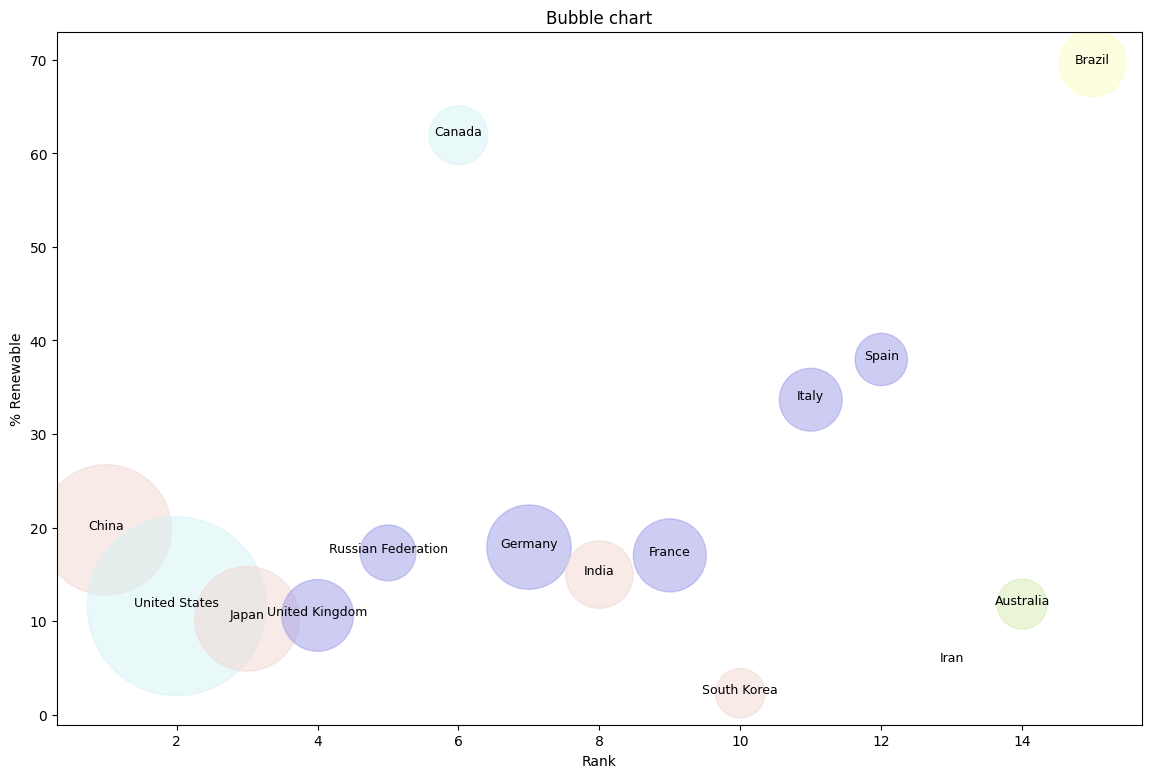

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 9))
ax.set_title("Bubble chart")
ax.set_xlabel("Rank")
ax.set_ylabel("% Renewable")
plt.scatter(result['Rank'], result['% Renewable'], s=result['2015'] / 10e8, c=result['Color'], alpha=0.5)
for i in range(len(result)):
    plt.annotate(result['Country'][i], (result['Rank'][i], result['% Renewable'][i]), fontsize=9, ha='center')
plt.show()